# 1. Understand the Problem
- **Objective**: Predict annual imports (quantity, weight, and value) for solar panels from 2025 to 2074.
- **Scope**: Identify key variables (e.g., quantity, weight, custom value) to forecast.


# 2. Load the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/Solar_Panels_Data.csv')
df.head(10)

,Year,HS Code,Quantity,Weight (Kgs.),Custom Value (Tshs.)
0,2007,850780000000,258571.0,1316554.0,2.457870e+09
1,2008,850780000000,268487.0,822924.0,5.394203e+09
2,2009,850780000000,427781.0,1189008.0,5.881601e+09
3,2010,850780000000,519970.0,1107608.0,3.485767e+10
4,2011,850780000000,371561.0,1468568.0,2.496047e+10
5,2012,850780000000,266875.0,2484772.0,1.744073e+10
6,2013,850780000000,1451519.0,2905748.0,1.447397e+10
7,2014,850780000000,3317028.0,4797320.0,3.223202e+10
8,2015,850780000000,2056164.0,7363565.0,6.128622e+10
9,2016,850780000000,2590596.0,4472023.0,3.519765e+10


In [ ]:
# Display column names
df.columns

Index(['Year', 'HS Code', 'Quantity', 'Weight (Kgs.)', 'Custom Value (Tshs.)'], dtype='object')

# 3. Data Preprocessing

In [ ]:
# Data Cleaning
# Step 1: Check for missing values
print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Handle missing values
# For simplicity, we fill missing numerical values with the median
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Weight (Kgs.)'] = df['Weight (Kgs.)'].fillna(df['Weight (Kgs.)'].median())
df['Custom Value (Tshs.)'] = df['Custom Value (Tshs.)'].fillna(df['Custom Value (Tshs.)'].median())

# If categorical data has missing values (e.g., 'HS Code'), fill with mode
df['HS Code'] = df['HS Code'].fillna(df['HS Code'].mode()[0])

# Step 2: Ensure data types are consistent
# Extract the numerical part of the 'Year' column using regular expressions
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)
df['HS Code'] = df['HS Code'].astype(str) # This line remains the same


Missing Values Before Cleaning:
Year                    0
HS Code                 0
Quantity                0
Weight (Kgs.)           0
Custom Value (Tshs.)    0
dtype: int64


In [ ]:
# Step 3: Detect and handle duplicate records
duplicates = df.duplicated()
if duplicates.sum() > 0:
    print(f"\nFound {duplicates.sum()} duplicate rows. Removing them.")
    df = df.drop_duplicates()

In [ ]:
# Step 4: Check for outliers using the IQR method
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect and review outliers
for col in ['Quantity', 'Weight (Kgs.)', 'Custom Value (Tshs.)']:
    outliers = detect_outliers(col)
    print(f"\nOutliers in {col}: {len(outliers)} rows")
    # Optionally, handle outliers (e.g., by capping values)
    df[col] = np.where(df[col] > outliers[col].quantile(0.95), outliers[col].quantile(0.95), df[col])
    df[col] = np.where(df[col] < outliers[col].quantile(0.05), outliers[col].quantile(0.05), df[col])


Outliers in Quantity: 0 rows

Outliers in Weight (Kgs.): 0 rows

Outliers in Custom Value (Tshs.): 0 rows


In [ ]:
# Step 5: Validate data ranges
assert df['Year'].between(2007, 2024).all(), "Year values fall outside the expected range."
assert (df[['Quantity', 'Weight (Kgs.)', 'Custom Value (Tshs.)']] >= 0).all().all(), "Negative values detected."

# Final Summary of Cleaned Data
print("\nData After Cleaning:")
print(df.info())

# Save the cleaned data
df.to_csv('/content/cleaned_Solar_Panels_Data.csv', index=False)
print("\nCleaned data saved to '/content/cleaned_Solar_Panels_Data.csv'.")



Data After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  18 non-null     int64  
 1   HS Code               18 non-null     object 
 2   Quantity              18 non-null     float64
 3   Weight (Kgs.)         18 non-null     float64
 4   Custom Value (Tshs.)  18 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 848.0+ bytes
None

Cleaned data saved to '/content/cleaned_Solar_Panels_Data.csv'.


In [ ]:
# Data formatting
# Not necessarily
# Step 1: Standardise column names
# Convert column names to lowercase, replace spaces with underscores, and remove special characters
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(' ', '_')
    .str.replace(r'[^\w]', '', regex=True)
)

print("\nStandardised Column Names:")
print(df.columns)


Standardised Column Names:
Index(['year', 'hs_code', 'quantity', 'weight_kgs', 'custom_value_tshs'], dtype='object')


In [ ]:
# Step 2: Convert year into a time-series format
# Add a 'date' column that represents the first day of the corresponding year
df['date'] = pd.to_datetime(df['year'], format='%Y')

# Drop the original 'year' column if it's no longer needed
df = df.drop(columns=['year'])

print("\nData After Adding Time-Series Format:")
print(df.head())

# Save the formatted data
df.to_csv('/content/formatted_Solar_Panels_Data.csv', index=False)
print("\nFormatted data saved to '/content/formatted_Solar_Panels_Data.csv'.")


Data After Adding Time-Series Format:
        hs_code  quantity  weight_kgs  custom_value_tshs       date
0  850780000000  258571.0   1316554.0       2.457870e+09 2007-01-01
1  850780000000  268487.0    822924.0       5.394203e+09 2008-01-01
2  850780000000  427781.0   1189008.0       5.881601e+09 2009-01-01
3  850780000000  519970.0   1107608.0       3.485767e+10 2010-01-01
4  850780000000  371561.0   1468568.0       2.496047e+10 2011-01-01

Formatted data saved to '/content/formatted_Solar_Panels_Data.csv'.


In [ ]:
# Display column names for formatted data
df.columns

Index(['hs_code', 'quantity', 'weight_kgs', 'custom_value_tshs', 'date'], dtype='object')

# 4. Exploratory Data Analysis (EDA)

In [ ]:
# # Visualise Historical Trends
# # Import necessary libraries
# # import pandas as pd
# # import matplotlib.pyplot as plt
# # import seaborn as sns

# # Load the formatted data
# df = pd.read_csv('/content/formatted_Solar_Panels_Data.csv')

# # Ensure 'date' is in datetime format
# df['date'] = pd.to_datetime(df['date'])

# # Step 1: Set 'date' as the index for time-series visualisation
# df.set_index('date', inplace=True)

# # Step 2: Plot the historical trends for quantity and custom value
# plt.figure(figsize=(14, 8))

# # Plot for Quantity
# plt.subplot(2, 1, 1)
# plt.plot(df.index, df['quantity'], marker='o', label='Quantity', color='blue')
# plt.title('Historical Trend of Quantity (2007–2024)', fontsize=16)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Quantity', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend()

# # Plot for Custom Value
# plt.subplot(2, 1, 2)
# plt.plot(df.index, df['custom_value_tshs'], marker='o', label='Custom Value (Tshs)', color='green')
# plt.title('Historical Trend of Custom Value (2007–2024)', fontsize=16)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Value (Tshs)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend()

# # Adjust layout and display
# plt.tight_layout()
# plt.show()

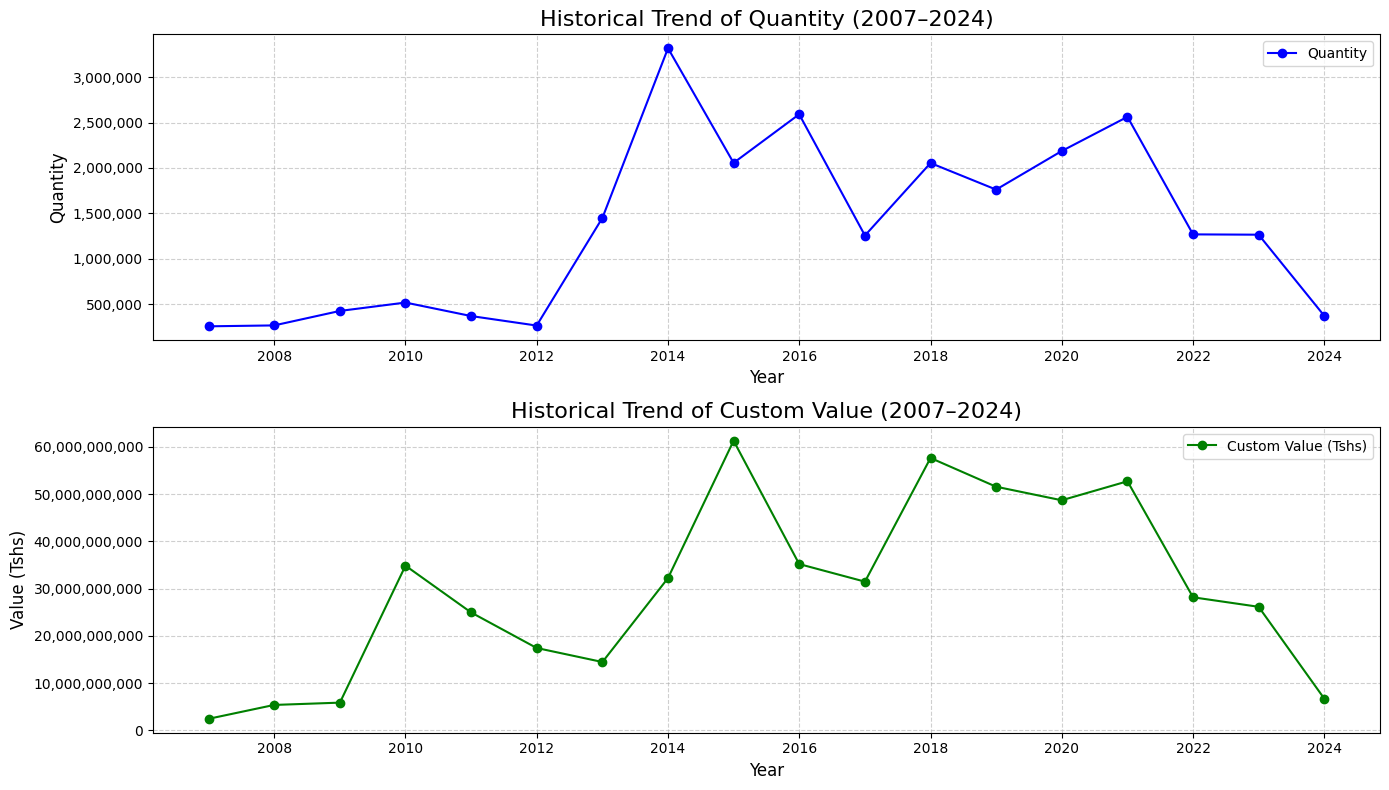

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the formatted data
df = pd.read_csv('/content/formatted_Solar_Panels_Data.csv')

# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 1: Set 'date' as the index for time-series visualisation
df.set_index('date', inplace=True)

# Custom function to format y-axis without scientific notation
def format_yaxis(x, _):
    return f"{int(x):,}"  # Formats with commas for thousands

# Step 2: Plot the historical trends for quantity and custom value
plt.figure(figsize=(14, 8))

# Plot for Quantity
plt.subplot(2, 1, 1)
plt.plot(df.index, df['quantity'], marker='o', label='Quantity', color='blue')
plt.title('Historical Trend of Quantity (2007–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))  # Apply custom formatting

# Plot for Custom Value
plt.subplot(2, 1, 2)
plt.plot(df.index, df['custom_value_tshs'], marker='o', label='Custom Value (Tshs)', color='green')
plt.title('Historical Trend of Custom Value (2007–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value (Tshs)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yaxis))  # Apply custom formatting

# Adjust layout and display
plt.tight_layout()
plt.show()


**Interprentation is your task. Make sure you interpret the graphs**

In [ ]:
# # Step 3: Investigate Seasonal Patterns and Cyclical Trends
# # Using a line plot to observe trends and potential anomalies
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df[['quantity', 'custom_value_tshs']])
# plt.title('Combined Trends: Quantity and Custom Value (2007–2024)', fontsize=16)
# plt.xlabel('Year', fontsize=12)
# plt.ylabel('Values', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.legend(labels=['Quantity', 'Custom Value'])
# plt.show()

# # Step 4: Identify Anomalies (Optional Visualisation)
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[['quantity', 'custom_value_tshs']], orient='h')
# plt.title('Box Plot for Quantity and Custom Value', fontsize=16)
# plt.xlabel('Values', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
# plt.show()


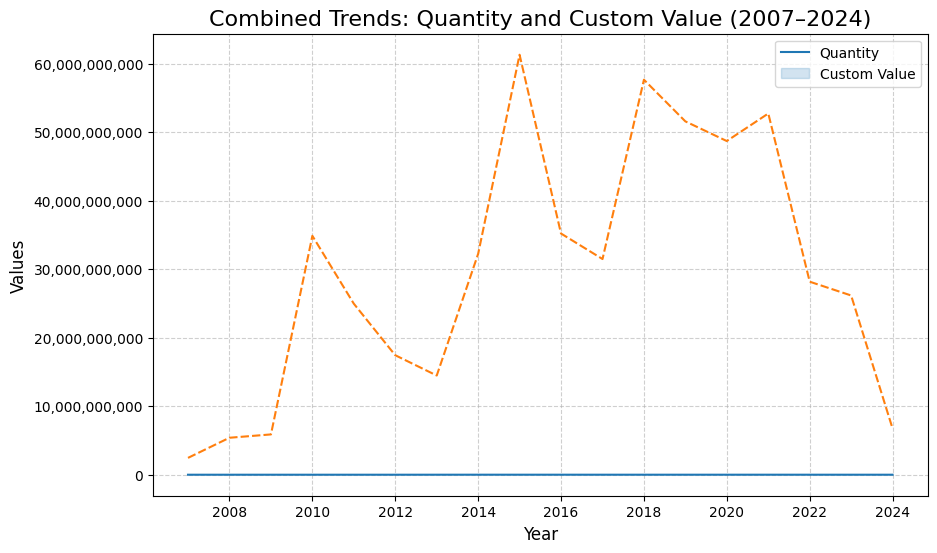

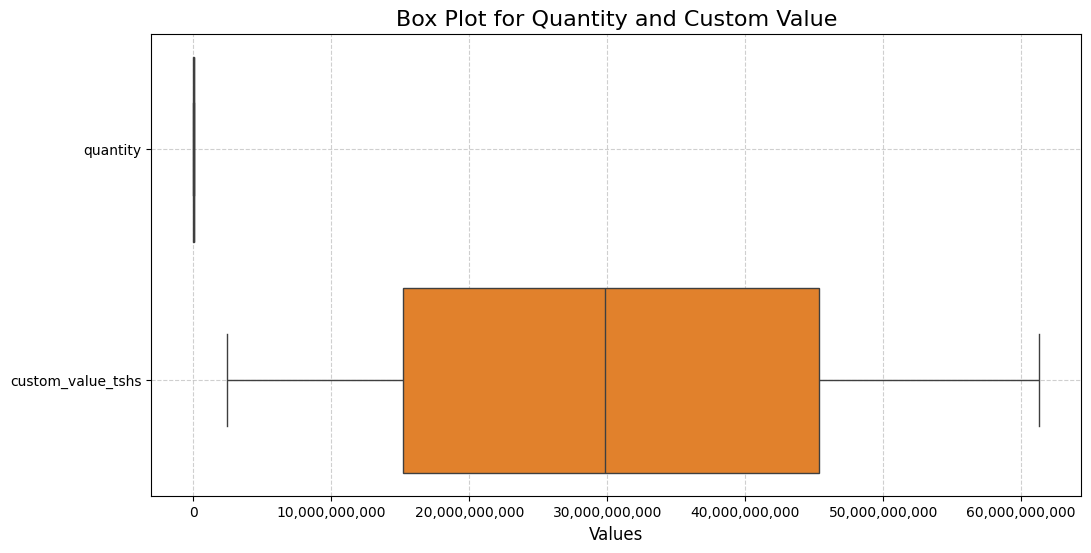

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# # Ensure 'date' is in datetime format if not already done
# df['date'] = pd.to_datetime(df['date'])

# Step 3: Investigate Seasonal Patterns and Cyclical Trends
plt.figure(figsize=(10, 6))

# Line plot for quantity and custom value
sns.lineplot(data=df[['quantity', 'custom_value_tshs']])
plt.title('Combined Trends: Quantity and Custom Value (2007–2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(labels=['Quantity', 'Custom Value'])

# Custom y-axis formatting for line plot
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()

# Step 4: Identify Anomalies (Box Plot Visualisation)
plt.figure(figsize=(12, 6))

# Box plot for quantity and custom value
sns.boxplot(data=df[['quantity', 'custom_value_tshs']], orient='h')
plt.title('Box Plot for Quantity and Custom Value', fontsize=16)
plt.xlabel('Values', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Custom x-axis formatting for box plot
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()


# 5. Feature Selection and Engineering

In [ ]:
# Feature selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# # Load the formatted data
# df = pd.read_csv('/content/formatted_Solar_Panels_Data.csv')

# # Display the first few rows of the dataframe
# print(df.head())

# Feature Engineering: Create value_per_kg feature
df['value_per_kg'] = df['custom_value_tshs'] / df['weight_kgs']

# Handle missing values (if any)
df = df.dropna()

# Define features and target variables
X = df.drop(['quantity', 'weight_kgs', 'custom_value_tshs'], axis=1)
y_quantity = df['quantity']
y_weight = df['weight_kgs']
y_value = df['custom_value_tshs']

# Split into training and testing sets
X_train, X_test, y_train_quantity, y_test_quantity = train_test_split(X, y_quantity, test_size=0.2, random_state=42)
_, _, y_train_weight, y_test_weight = train_test_split(X, y_weight, test_size=0.2, random_state=42)
_, _, y_train_value, y_test_value = train_test_split(X, y_value, test_size=0.2, random_state=42)

In [ ]:
# Feature Selection using LassoCV for each target variable
def select_features(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    lasso = LassoCV(cv=5).fit(X_train_scaled, y_train)
    model = SelectFromModel(lasso, prefit=True)
    X_train_selected = model.transform(X_train_scaled)

    selected_features = X.columns[(model.get_support())]
    return selected_features

# Select features for each target variable
selected_features_quantity = select_features(X_train, y_train_quantity)
selected_features_weight = select_features(X_train, y_train_weight)
selected_features_value = select_features(X_train, y_train_value)

# Print selected features
print("Selected features for predicting quantity:", selected_features_quantity)
print("Selected features for predicting weight:", selected_features_weight)
print("Selected features for predicting value:", selected_features_value)

Selected features for predicting quantity: Index(['value_per_kg'], dtype='object')
Selected features for predicting weight: Index(['value_per_kg'], dtype='object')
Selected features for predicting value: Index(['value_per_kg'], dtype='object')


# 6. Data Training and Validation

In [ ]:
# Data Splitting
import pandas as pd

# Load the formatted data
df = pd.read_csv('/content/formatted_Solar_Panels_Data.csv')

# Feature Engineering: Create value_per_kg feature
df['value_per_kg'] = df['custom_value_tshs'] / df['weight_kgs']

# Handle missing values (if any)
df = df.dropna()

# Extract the year from the 'date' column
df['year'] = pd.to_datetime(df['date']).dt.year # Extract year from 'date' column

# Split the dataset into training and testing sets
train_data = df[df['year'] < 2020] # Now use the extracted 'year' column
test_data = df[df['year'] >= 2020] # Now use the extracted 'year' column


# Save the training and testing datasets to CSV files
train_data.to_csv('train_Solar_Panels_Data.csv', index=False)
test_data.to_csv('test_Solar_Panels_Data.csv', index=False)

# Display the first few rows of the training and testing datasets
print("Training Data:")
print(train_data.head())

print("\nTesting Data:")
print(test_data.head())

Training Data:
        hs_code  quantity  weight_kgs  custom_value_tshs        date  \
0  850780000000  258571.0   1316554.0       2.457870e+09  2007-01-01   
1  850780000000  268487.0    822924.0       5.394203e+09  2008-01-01   
2  850780000000  427781.0   1189008.0       5.881601e+09  2009-01-01   
3  850780000000  519970.0   1107608.0       3.485767e+10  2010-01-01   
4  850780000000  371561.0   1468568.0       2.496047e+10  2011-01-01   

   value_per_kg  year  
0   1866.896129  2007  
1   6554.922238  2008  
2   4946.645623  2009  
3  31471.126975  2010  
4  16996.471993  2011  

Testing Data:
         hs_code    quantity  weight_kgs  custom_value_tshs        date  \
13  850780000000  2186313.00  4957586.00       4.869169e+10  2020-01-01   
14  850780000000  2562538.00  6043358.00       5.271025e+10  2021-01-01   
15  850780000000  1269700.25  2639561.24       2.816697e+10  2022-01-01   
16  850780000000  1266334.27  2589559.97       2.615437e+10  2023-01-01   
17  850780000000  

In [ ]:
# !pip install prophet # Install the correct library

In [ ]:
# Model Training
import pandas as pd
import numpy as np
from prophet import Prophet  # Ensure correct import
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import logging

# Suppress logging for Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

# Load the formatted data
# df = pd.read_csv('/content/formatted_Solar_Panels_Data.csv')

# Feature Engineering: Create value_per_kg feature
df['value_per_kg'] = df['custom_value_tshs'] / df['weight_kgs']

# Handle missing values (if any)
df = df.dropna()

# Ensure the 'year' column is of datetime type
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Prepare data for Prophet for each target variable
df_quantity = df[['year', 'quantity', 'value_per_kg']].rename(columns={'year': 'ds', 'quantity': 'y'})

# Split the dataset into training and testing sets
train_quantity = df_quantity[df_quantity['ds'] < '2020-01-01']
test_quantity = df_quantity[df_quantity['ds'] >= '2020-01-01']

# Save the training and testing datasets to CSV files (optional)
# train_quantity.to_csv('/content/train_Solar_Panels_Data_quantity.csv', index=False)
# test_quantity.to_csv('/content/test_Solar_Panels_Data_quantity.csv', index=False)

In [ ]:
# Define model functions
def prophet_model(train):
    model = Prophet()
    model.add_regressor('value_per_kg')
    model.fit(train)
    return model

def arima_model(train):
    model = ARIMA(train['y'], order=(5,1,0), exog=train['value_per_kg'])
    model_fit = model.fit()
    return model_fit

def linear_regression_model(train):
    model = LinearRegression()
    model.fit(train[['value_per_kg']], train['y'])
    return model

# Train models on the training set for quantity
model_quantity_prophet = prophet_model(train_quantity)
model_quantity_arima = arima_model(train_quantity)
model_quantity_lr = linear_regression_model(train_quantity)

# Test the models on the testing set for quantity
def test_model(model, test, model_type, scaler=None):
    if model_type == 'prophet':
        future = test[['ds', 'value_per_kg']]
        forecast = model.predict(future)
        y_pred = forecast['yhat'].values
    elif model_type == 'arima':
        forecast = model.forecast(steps=len(test), exog=test[['value_per_kg']])
        y_pred = forecast
    elif model_type == 'linear_regression':
        y_pred = model.predict(test[['value_per_kg']])

    mae = mean_absolute_error(test['y'], y_pred)
    return mae, y_pred

In [ ]:
# Validate models on the testing set
prophet_mae, prophet_pred = test_model(model_quantity_prophet, test_quantity, 'prophet')
arima_mae, arima_pred = test_model(model_quantity_arima, test_quantity, 'arima')
lr_mae, lr_pred = test_model(model_quantity_lr, test_quantity, 'linear_regression')

# Print the results
print("Testing MAE for Quantity Predictions:")
print(f"Prophet: {prophet_mae}")
print(f"ARIMA: {arima_mae}")
print(f"Linear Regression: {lr_mae}")

# Make future DataFrame for predictions from 2025 to 2074
future_dates = pd.date_range(start='2025-01-01', periods=50, freq='Y')
future = pd.DataFrame({'ds': future_dates})
future['value_per_kg'] = df['value_per_kg'].mean()  # Replace with more sophisticated approach if needed

# Predict future values using the best model (replace with the best model based on previous evaluation)
# Example with Prophet for Quantity
forecast_quantity = model_quantity_prophet.predict(future)
predicted_quantity = forecast_quantity[['ds', 'yhat']]

# Print predictions
print("\nPredicted Quantity from 2025 to 2074:\n", predicted_quantity)

Testing MAE for Quantity Predictions:
Prophet: 1398310.2277180846
ARIMA: 650520.3899980856
Linear Regression: 624031.5444178726

Predicted Quantity from 2025 to 2074:
            ds          yhat
0  2025-12-31  3.523775e+06
1  2026-12-31  3.638376e+06
2  2027-12-31  3.742231e+06
3  2028-12-31  4.135735e+06
4  2029-12-31  4.261190e+06
5  2030-12-31  4.375791e+06
6  2031-12-31  4.479647e+06
7  2032-12-31  4.873150e+06
8  2033-12-31  4.998605e+06
9  2034-12-31  5.113206e+06
10 2035-12-31  5.217062e+06
11 2036-12-31  5.610566e+06
12 2037-12-31  5.736021e+06
13 2038-12-31  5.850621e+06
14 2039-12-31  5.954477e+06
15 2040-12-31  6.347981e+06
16 2041-12-31  6.473436e+06
17 2042-12-31  6.588036e+06
18 2043-12-31  6.691892e+06
19 2044-12-31  7.085396e+06
20 2045-12-31  7.210851e+06
21 2046-12-31  7.325451e+06
22 2047-12-31  7.429307e+06
23 2048-12-31  7.822811e+06
24 2049-12-31  7.948266e+06
25 2050-12-31  8.062866e+06
26 2051-12-31  8.166722e+06
27 2052-12-31  8.560226e+06
28 2053-12-31  8.685

Based on the MAE values, the **Linear Regression model** has the best performance for predicting quantity, with the lowest MAE of approximately 624,031. The ARIMA model is the second-best with an MAE of approximately 650,520, and the Prophet model has the highest MAE of approximately 1,398,310, indicating the poorest performance among the three models for this task.

# 7. Forecast Future Trends/Generate Predictions


In [ ]:
# Prediction
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# # Load the formatted data
# df = pd.read_csv('/content/formatted_Solar_Panels_Data.csv')

# # Feature Engineering: Create value_per_kg feature
# df['value_per_kg'] = df['custom_value_tshs'] / df['weight_kgs']

# # Handle missing values (if any)
# df = df.dropna()

# # Ensure the 'year' column is of datetime type
# df['year'] = pd.to_datetime(df['year'], format='%Y')

# Prepare data for each target variable
df_quantity = df[['year', 'quantity', 'value_per_kg']].rename(columns={'year': 'ds', 'quantity': 'y'})
df_weight = df[['year', 'weight_kgs', 'value_per_kg']].rename(columns={'year': 'ds', 'weight_kgs': 'y'})
df_value = df[['year', 'custom_value_tshs', 'value_per_kg']].rename(columns={'year': 'ds', 'custom_value_tshs': 'y'})

# Split the datasets into training and testing sets
train_quantity = df_quantity[df_quantity['ds'] < '2020-01-01']
test_quantity = df_quantity[df_quantity['ds'] >= '2020-01-01']

train_weight = df_weight[df_weight['ds'] < '2020-01-01']
test_weight = df_weight[df_weight['ds'] >= '2020-01-01']

train_value = df_value[df_value['ds'] < '2020-01-01']
test_value = df_value[df_value['ds'] >= '2020-01-01']

# Define Linear Regression model function
def linear_regression_model(train):
    model = LinearRegression()
    model.fit(train[['value_per_kg']], train['y'])
    return model

# Train Linear Regression models on the training sets
model_quantity_lr = linear_regression_model(train_quantity)
model_weight_lr = linear_regression_model(train_weight)
model_value_lr = linear_regression_model(train_value)

# Test the models on the testing sets
def test_model(model, test):
    y_pred = model.predict(test[['value_per_kg']])
    mae = mean_absolute_error(test['y'], y_pred)
    return mae, y_pred

# Validate models on the testing sets
quantity_mae, quantity_pred = test_model(model_quantity_lr, test_quantity)
weight_mae, weight_pred = test_model(model_weight_lr, test_weight)
value_mae, value_pred = test_model(model_value_lr, test_value)

# Print the results
print("Testing MAE for Predictions:")
print(f"Quantity: {quantity_mae:.4f}")
print(f"Weight: {weight_mae:.4f}")
print(f"Custom Value: {value_mae:.4f}")


Testing MAE for Predictions:
Quantity: 624031.5444
Weight: 1635398.7036
Custom Value: 14014161875.7474


In [ ]:
# # Modified Future DataFrame for predictions from 2025 to 2074
# future_dates = pd.date_range(start='2025-01-01', end='2074-12-31', freq='Y')
# future = pd.DataFrame({'ds': future_dates})

# # Replace constant value_per_kg with a dynamic trend
# # Assuming a linear growth trend based on the last observed value and an annual increment
# last_observed_value = df['value_per_kg'].iloc[-1]  # Get the last observed value
# annual_growth_rate = 0.02  # Assume a 2% annual growth for value_per_kg
# future['value_per_kg'] = last_observed_value * (1 + annual_growth_rate) ** (future.index + 1)

# # Predict future values using the trained Linear Regression models
# # Quantity Predictions
# future['quantity'] = model_quantity_lr.predict(future[['value_per_kg']])

# # Weight Predictions
# future['weight'] = model_weight_lr.predict(future[['value_per_kg']])

# # Custom Value Predictions
# future['custom_value'] = model_value_lr.predict(future[['value_per_kg']])

# # Format `ds` column to display only the year
# future['year'] = future['ds'].dt.year

# # Select relevant columns and format predicted values to avoid scientific notation
# future_formatted = future[['year', 'quantity', 'weight', 'custom_value']].copy()
# future_formatted = future_formatted.round(4)  # Round to 4 decimal places

# # Print predictions
# print("\nPredicted Values from 2025 to 2074:\n", future_formatted)

# # Save predictions to a single CSV file
# future_formatted.to_csv('Predicted_Values_2025_2074.csv', index=False)


In [ ]:
# Modified Future DataFrame for predictions from 2025 to 2074
future_dates = pd.date_range(start='2025-01-01', end='2074-12-31', freq='Y')
future = pd.DataFrame({'ds': future_dates})

# Replace constant value_per_kg with a dynamic trend
# Assuming a linear growth trend based on the last observed value and an annual increment
last_observed_value = df['value_per_kg'].iloc[-1]  # Get the last observed value
annual_growth_rate = 0.02  # Assume a 2% annual growth for value_per_kg
future['value_per_kg'] = last_observed_value * (1 + annual_growth_rate) ** (future.index + 1)

# Predict future values using the trained Linear Regression models
# Quantity Predictions
future['Quantity'] = model_quantity_lr.predict(future[['value_per_kg']])

# Weight Predictions
future['Weight (Kgs.)'] = model_weight_lr.predict(future[['value_per_kg']])

# Custom Value Predictions
future['Custom Value (Tshs.)'] = model_value_lr.predict(future[['value_per_kg']])

# Format `ds` column to display only the year
future['Year'] = future['ds'].dt.year

# Select relevant columns and format predicted values to avoid scientific notation
future_formatted = future[['Year', 'Quantity', 'Weight (Kgs.)', 'Custom Value (Tshs.)']].copy()
future_formatted = future_formatted.round(2)  # Round to 2 decimal places

# Print predictions
print("\nPredicted Values from 2025 to 2074:\n", future_formatted)

# Save predictions to a single CSV file
future_formatted.to_csv('Predicted_Values_2025_2074.csv', index=False)



Predicted Values from 2025 to 2074:
     Year    Quantity  Weight (Kgs.)  Custom Value (Tshs.)
0   2025  1298565.76     3300342.17          2.803396e+10
1   2026  1294706.87     3291456.04          2.817806e+10
2   2027  1290770.80     3282392.19          2.832504e+10
3   2028  1286756.02     3273147.06          2.847496e+10
4   2029  1282660.93     3263717.02          2.862788e+10
5   2030  1278483.95     3254098.39          2.878386e+10
6   2031  1274223.43     3244287.38          2.894296e+10
7   2032  1269877.69     3234280.15          2.910523e+10
8   2033  1265445.05     3224072.78          2.927076e+10
9   2034  1260923.74     3213661.26          2.943959e+10
10  2035  1256312.02     3203041.51          2.961181e+10
11  2036  1251608.05     3192209.37          2.978746e+10
12  2037  1246810.01     3181160.58          2.996663e+10
13  2038  1241916.01     3169890.82          3.014938e+10
14  2039  1236924.13     3158395.66          3.033579e+10
15  2040  1231832.41     3146670.6

# Visualization and Reporting (Out of agreement, but I have implemented it)

In [261]:
# # Visualization of the predicted imports over time
# plt.figure(figsize=(14, 8))

# # Plot Quantity Predictions
# plt.subplot(3, 1, 1)
# plt.plot(future_formatted['Year'], future_formatted['Quantity'], marker='o', linestyle='-', color='b')
# plt.title('Predicted Quantity from 2025 to 2074')
# plt.xlabel('Year')
# plt.ylabel('Quantity')
# plt.grid(True)

# # Plot Weight Predictions
# plt.subplot(3, 1, 2)
# plt.plot(future_formatted['Year'], future_formatted['Weight (Kgs.)'], marker='o', linestyle='-', color='g')
# plt.title('Predicted Weight (Kgs.) from 2025 to 2074')
# plt.xlabel('Year')
# plt.ylabel('Weight (Kgs.)')
# plt.grid(True)

# # Plot Custom Value Predictions
# plt.subplot(3, 1, 3)
# plt.plot(future_formatted['Year'], future_formatted['Custom Value (Tshs.)'], marker='o', linestyle='-', color='r')
# plt.title('Predicted Custom Value (Tshs.) from 2025 to 2074')
# plt.xlabel('Year')
# plt.ylabel('Custom Value (Tshs.)')
# plt.grid(True)

# # Adjust layout and show plot
# plt.tight_layout()
# plt.show()

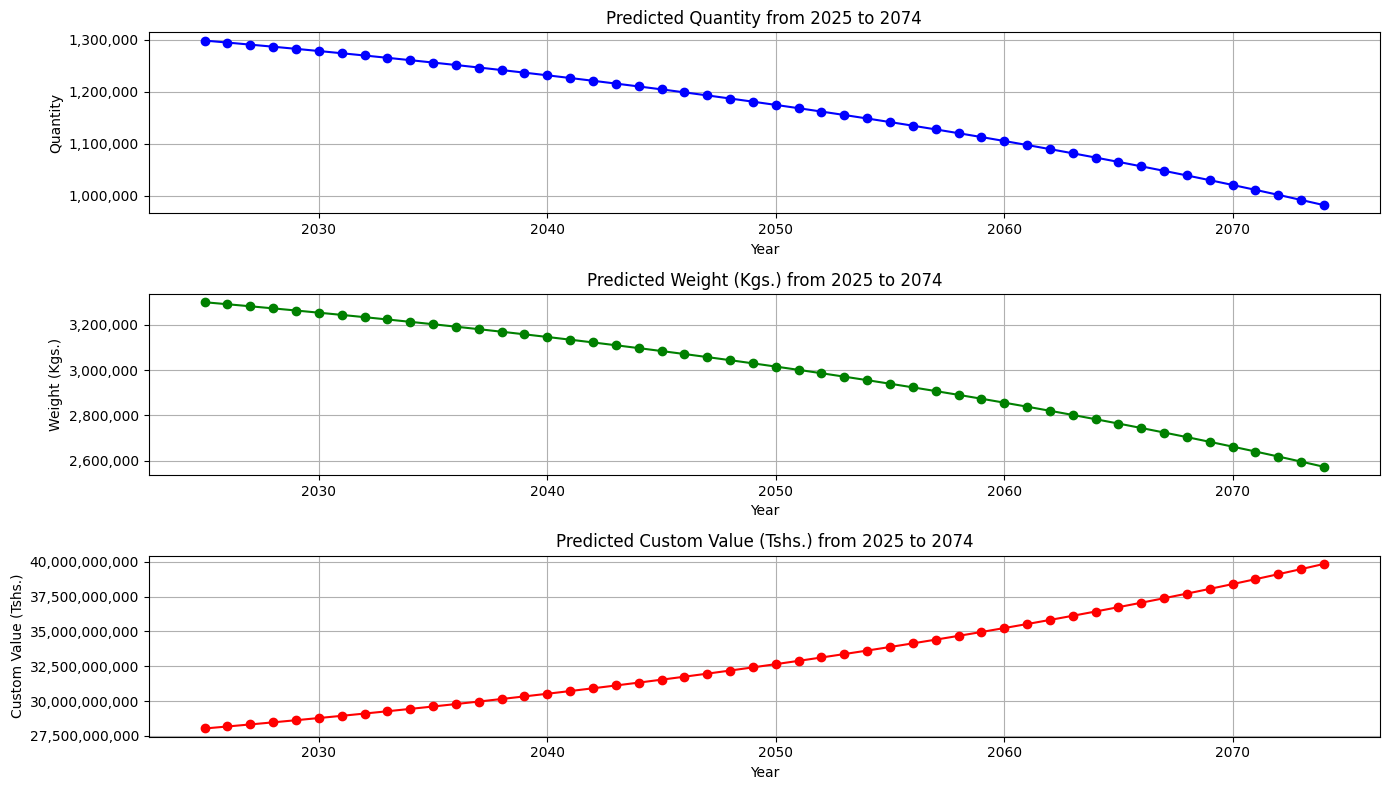

In [260]:
# Visualization of the predicted imports over time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define a formatter function to convert scientific notation to standard notation
def format_func(value, tick_number):
    return f'{value:,.0f}'  # Format with comma as thousands separator and no decimals

plt.figure(figsize=(14, 8))

# Plot Quantity Predictions
plt.subplot(3, 1, 1)
plt.plot(future_formatted['Year'], future_formatted['Quantity'], marker='o', linestyle='-', color='b')
plt.title('Predicted Quantity from 2025 to 2074')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Plot Weight Predictions
plt.subplot(3, 1, 2)
plt.plot(future_formatted['Year'], future_formatted['Weight (Kgs.)'], marker='o', linestyle='-', color='g')
plt.title('Predicted Weight (Kgs.) from 2025 to 2074')
plt.xlabel('Year')
plt.ylabel('Weight (Kgs.)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Plot Custom Value Predictions
plt.subplot(3, 1, 3)
plt.plot(future_formatted['Year'], future_formatted['Custom Value (Tshs.)'], marker='o', linestyle='-', color='r')
plt.title('Predicted Custom Value (Tshs.) from 2025 to 2074')
plt.xlabel('Year')
plt.ylabel('Custom Value (Tshs.)')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Adjust layout and show plot
plt.tight_layout()
plt.show()

**Report the results and insights gained from the predictions, that is, interpret the above graphs.**